<a href="https://colab.research.google.com/github/subham129/Machine-Learning-/blob/main/Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install pandas_datareader yfinance


In [5]:
import yfinance as yf

In [8]:
data = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500
2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100
2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800


<Axes: xlabel='Date'>

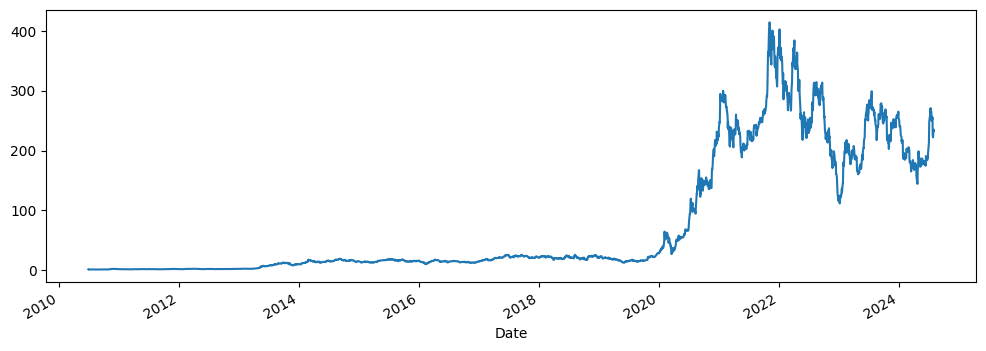

In [16]:
data['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

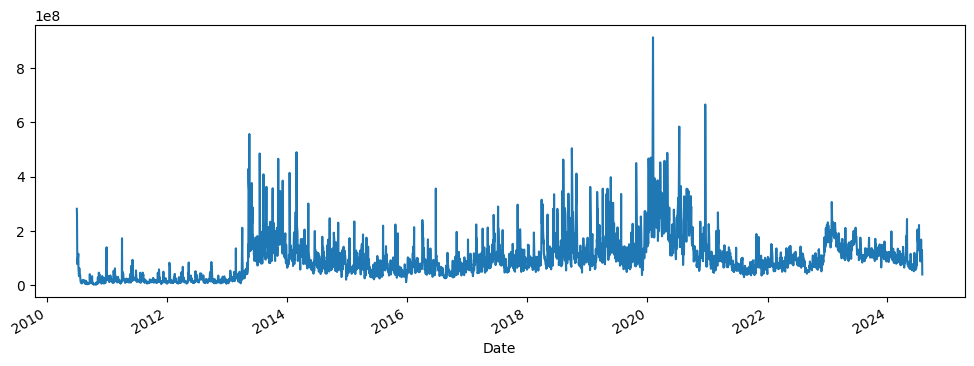

In [17]:
data['Volume'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

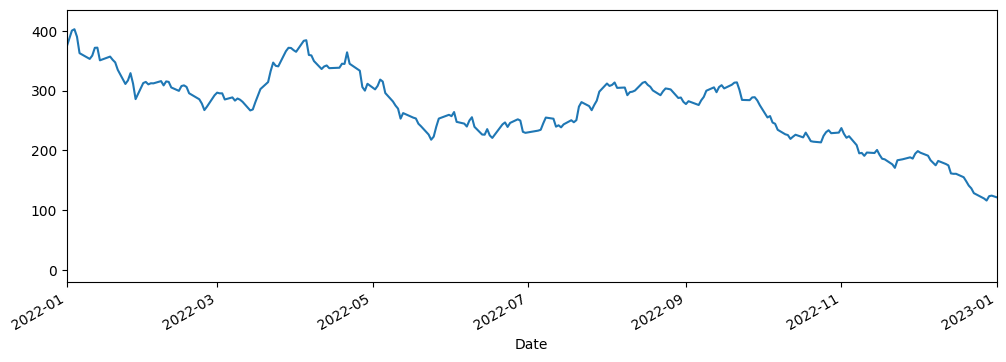

In [18]:
data['High'].plot(xlim=['2022-01-01','2023-01-01'],figsize=(12,4))

In [20]:
print(f"Highest value ={data['High'].max()}, lowest value ={data['Low'].min()}")

Highest value =414.4966735839844, lowest value =0.9986670017242432


In [27]:
data['High'].idxmax()

Timestamp('2021-11-04 00:00:00')

In [26]:
data.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', length=3546, freq=None)

In [35]:
high = data.loc['2021-11-04':'2021-11-10']['High']

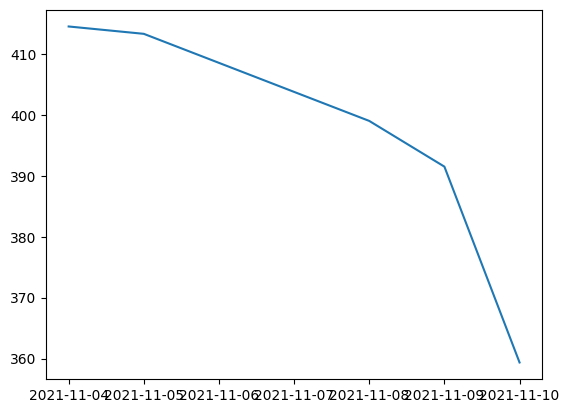

In [36]:
figure,axis=plt.subplots()
axis.plot(high)

In [37]:
index=data.loc['2020-01-01':'2021-09-01'].index
share_open=data.loc['2020-01-01':'2021-09-01']['Open']

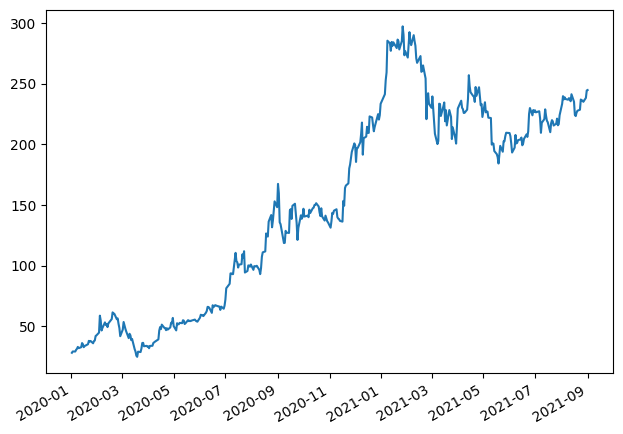

In [38]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [39]:
data = data.reset_index()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3546 non-null   datetime64[ns]
 1   Open       3546 non-null   float64       
 2   High       3546 non-null   float64       
 3   Low        3546 non-null   float64       
 4   Close      3546 non-null   float64       
 5   Adj Close  3546 non-null   float64       
 6   Volume     3546 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 194.0 KB


In [41]:
pd.to_datetime(data['Date'])

,Date
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
5,2010-07-07
6,2010-07-08
7,2010-07-09
8,2010-07-12
9,2010-07-13


In [43]:
data.set_index(data['Date'],drop=True,inplace=True)

In [45]:
data.drop(columns='Date',inplace=True)

In [46]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [47]:
datetime.now()

datetime.datetime(2024, 7, 31, 17, 20, 30, 324739)

<Axes: xlabel='Date'>

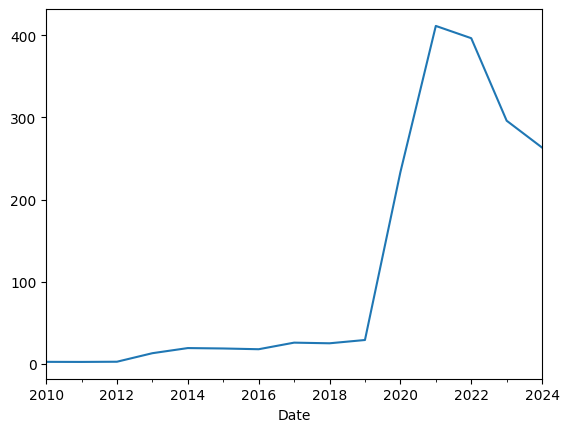

In [50]:
data.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

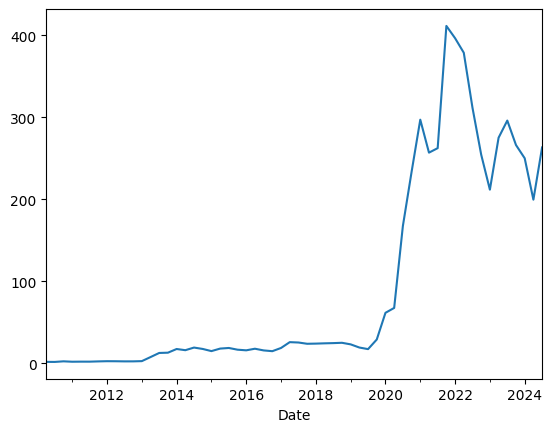

In [54]:
data.resample(rule='QS').max()['Open'].plot()

<Axes: xlabel='Date'>

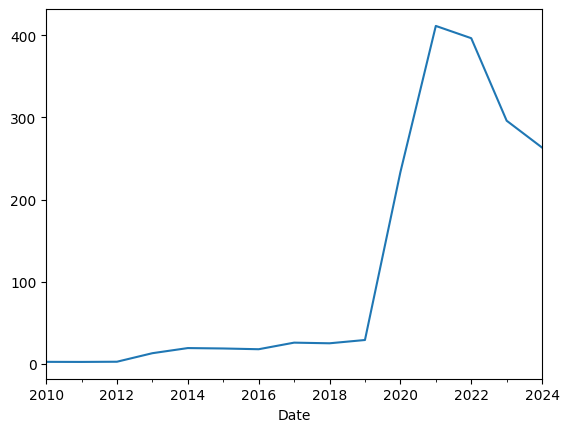

In [56]:
data.resample(rule='BA').max()['Open'].plot()

<Axes: xlabel='Date'>

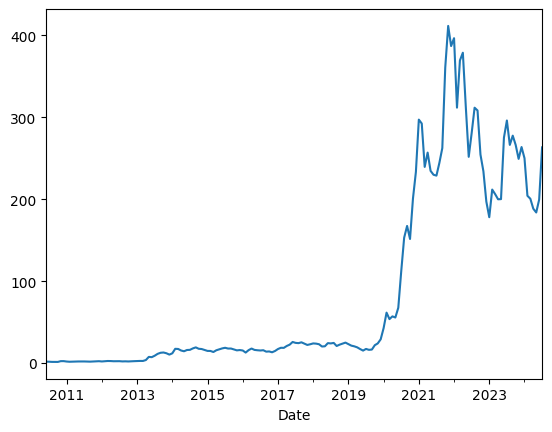

In [58]:
data.resample(rule='M').max()['Open'].plot()

<Axes: xlabel='Date'>

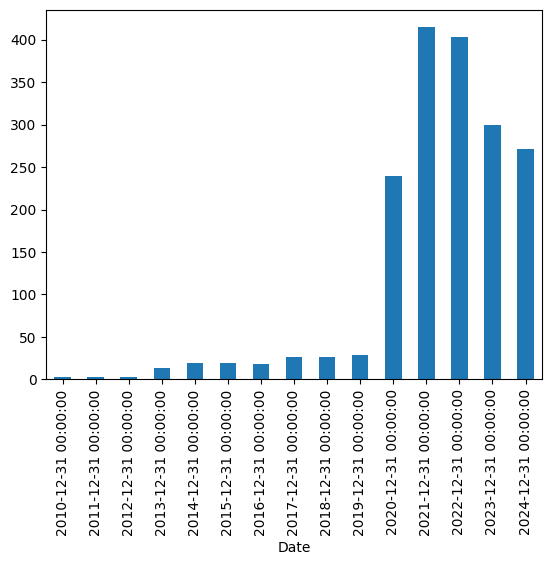

In [59]:
data['High'].resample(rule='A').max().plot(kind='bar')

In [63]:
data['High'].rolling(2).mean().head(20)

,High
Date,
2010-06-29,NaN
2010-06-30,1.847334
2010-07-01,1.878000
2010-07-02,1.634000
2010-07-06,1.436666
2010-07-07,1.221000
2010-07-08,1.138333
2010-07-09,1.180667
2010-07-12,1.199000


In [64]:
df = yf.download('MSFT')

[*********************100%%**********************]  1 of 1 completed


In [65]:
df.shape

(9673, 6)

In [67]:
df.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', length=9673, freq=None)

In [69]:
print(f"Highest value ={df['High'].max()} in {df['High'].idxmax()}, lowest value ={df['Low'].min()}, in {df['Low'].idxmin()}")

Highest value =468.3500061035156 in 2024-07-05 00:00:00, lowest value =0.08854199945926666, in 1986-03-13 00:00:00


<Axes: xlabel='Date'>

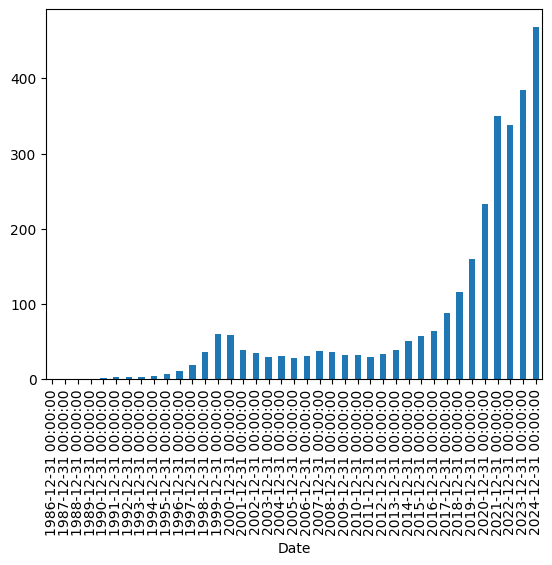

In [70]:
df['High'].resample(rule='A').max().plot(kind='bar')